# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [24]:
# Your code here
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [25]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [26]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [27]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [28]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

<function matplotlib.pyplot.show(close=None, block=None)>

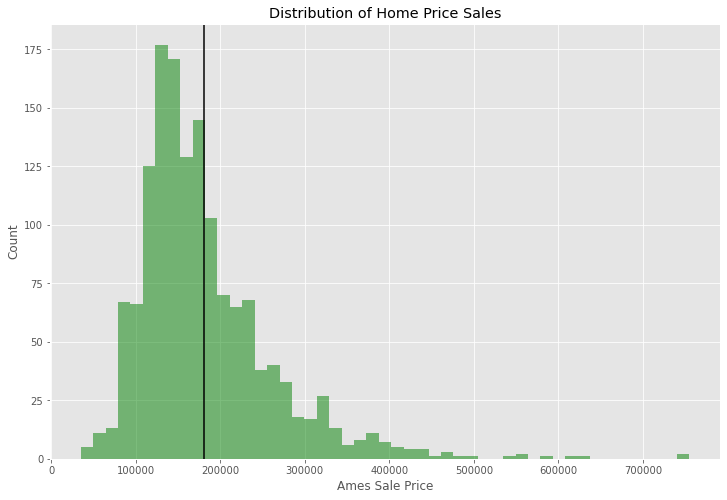

In [74]:
# Your code here
saledata = df['SalePrice']


fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(saledata, bins = 'auto', color='green', alpha = 0.5)
ax.set_xlabel('Ames Sale Price')
ax.set_ylabel('Count')
ax.set_title('Distribution of Home Price Sales')
ax.axvline(saledata.mean(), color = 'black');
plt.show

Now, print out the mean, median, and standard deviation:

In [55]:
# Your code here
print("The home sale mean is", + saledata.mean())
print("The home sale median is", + saledata.median())
print("The home sale standard deviation is", + saledata.std())

The home sale mean is 180921.19589041095
The home sale median is 163000.0
The home sale standard deviation is 79442.50288288662


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
The mean sale price of a home in the city of Ames was just under 181,000 USD. Because 
more homes were sold below the mean it is helpful to examine the outliers that drive the mean
upwards, particularly in the 400,000 USD to 700,000 USD range. This also causes the standard price deviation 
of a home to vary as much as 79,000 USD. Perhaps a more useful measure in this 
case would be to examine the median sale price. The median sale price was 163,000 USD for the date range. Consumers and realtors
could make better use of this number when looking at real estate sales and purchases in their decision making
processes. 

"""

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

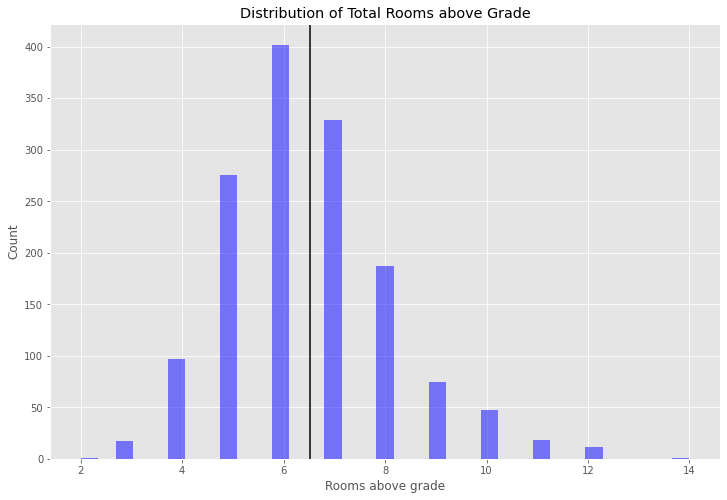

In [75]:
# Your code here
roomdata = df['TotRmsAbvGrd']


fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(roomdata, bins = 'auto', color='blue', alpha = 0.5)
ax.set_xlabel('Rooms above grade')
ax.set_ylabel('Count')
ax.set_title('Distribution of Total Rooms above Grade')
ax.axvline(roomdata.mean(), color = 'black');
plt.show()

Now, print out the mean, median, and standard deviation:

In [57]:
# Your code here
print("The rooms above grade mean is", + roomdata.mean())
print("The rooms above grade median is", + roomdata.median())
print("The rooms above grade standard deviation is", + roomdata.std())

The rooms above grade mean is 6.517808219178082
The rooms above grade median is 6.0
The rooms above grade standard deviation is 1.6253932905840505


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
The rooms above grade level will vary from house to house. The majority of homes have from 5 to 8 rooms
above grade with the mean at close to 6.5 rooms above grade. This is close to the median of 6 rooms above grade. 
Because of outliers at 11, 12, and 14 the mean skews higher than the median. 
Consumers and sellers can use this data to determine the value of their home and possible 
listing prices and offer prices. The standard deviation from the mean is 1.625 rooms, it would be wise to 
consider the total rooms above grade but also the overall home condition in the next histogram.
"""

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

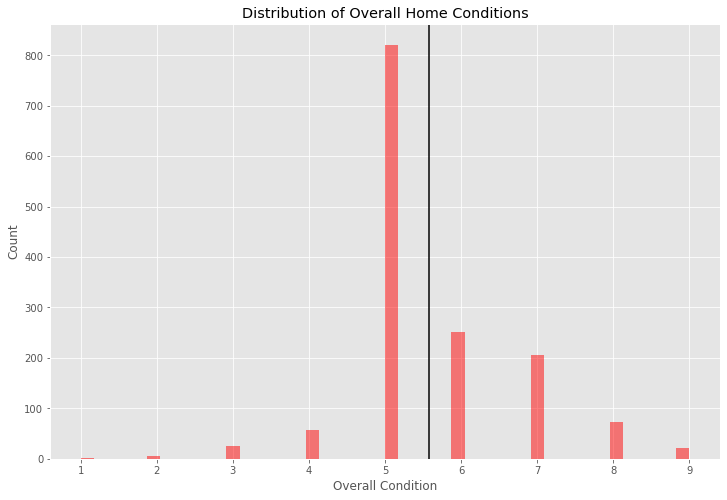

In [88]:
# Your code here
conddata = df['OverallCond']


fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(conddata, bins = 'auto', color='red', alpha = 0.5)
ax.set_xlabel('Overall Condition')
ax.set_ylabel('Count')
ax.set_title('Distribution of Overall Home Conditions')
ax.axvline(conddata.mean(), color = 'black');
plt.show()

Now, print out the mean, median, and standard deviation:

In [67]:
# Your code here
print("The overall conditions mean is", + conddata.mean())
print("The overall conditions median is", + conddata.median())
print("The overall conditions standard deviation is", + conddata.std())

The overall conditions mean is 5.575342465753424
The overall conditions median is 5.0
The overall conditions standard deviation is 1.1127993367127316


In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
The overall condition of the home runs on a scale of 1 to 10. Most homes fall with the 5 category suggesting many 
homes are satisfactory but are in need of some type of upgrade or repair to push the home into
higher categories. The mean condition is 5.75 with the median at 5.0, the median is perhaps the more
reliable number to examine since that tracks closely with the mode of the dataset as well. It is important
to remember that the overall conditions rankings are subjective and should be viewed as categories rather 
than fixed numbers compared to the other histograms detailing home price and rooms above grade. 
"""

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [90]:
# Replace None with appropriate code
below_average_condition = df[conddata < 5]
average_condition = df[conddata == 5]
above_average_condition = df[conddata > 5]

The following code checks that you created the subsets correctly:

In [91]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

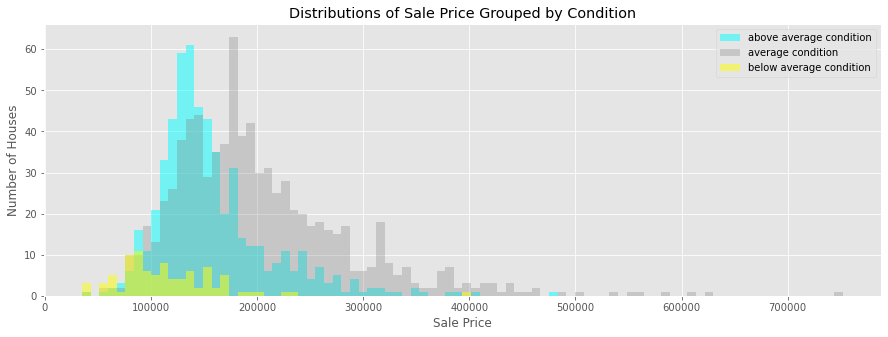

In [92]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
# Replace None with appropriate text
"""
Homes with average conditions, meaning a categorical ranking of 5, are represented across the distribution with 
their peak close to the median home sale price. Homes that were considered above average with a ranking above a 5 
skew below the median and are most heavily represented in the 110,000 USD up to approximately the median of 163,000 USD.
This could suggest that homes with a lower price point were more acceptable for their condition and perhaps 
were considered a good bargain for what the buyer was getting.  Homes that were below average, below a 5 ranking, are also
represented below the median, it appears that the lower the price point in this ranking was not enough to make up
for the poorer conditions of the home. 
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [131]:
# Your code here
saleprice_corr = df.corr()['SalePrice'].sort_values()


print(saleprice_corr)
print("The maximum correlation between Sale Price and another variable is " + str(saleprice_corr[-2]))
print("The most strongly correlated variable is ", (saleprice_corr.index[-2]))




Age             -0.523350
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

Now, find the ***most negatively correlated*** column:

In [132]:
# Your code here

print("The smallest correlation between Sale Price and another variable is " + str(saleprice_corr[0]))
print("The most negatively correlated variable is ", (saleprice_corr.index[0]))

The smallest correlation between Sale Price and another variable is -0.5233504175468154
The most negatively correlated variable is  Age


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

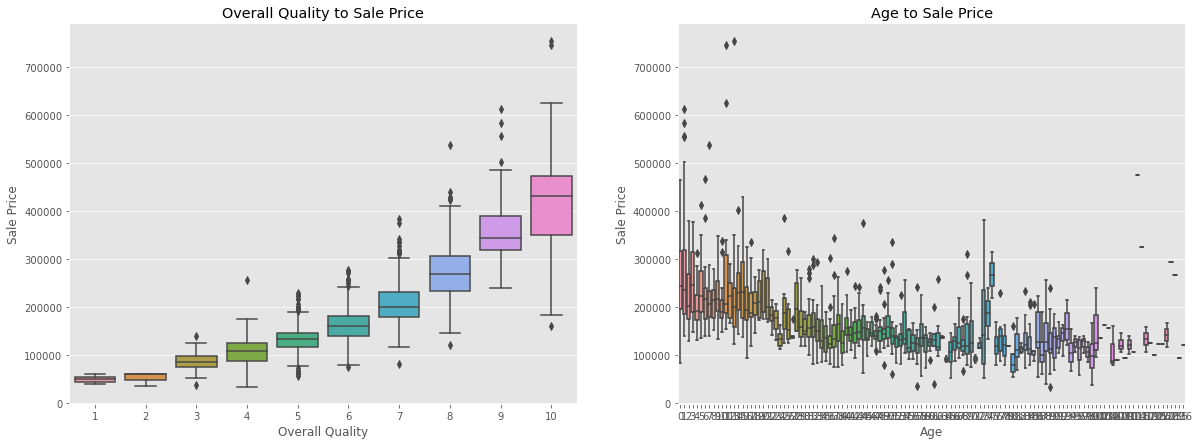

In [134]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['Age'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality to Sale Price")
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Age to Sale Price')
ax2.set_xlabel('Age')
ax2.set_ylabel("Sale Price");
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
The overal quality of a home is most strongly correlated to the sale price. The higher the quality tends positively
toward a higher sale price for a home. The overall quality of a home is a categorical ranking ranging from 1 to 10. 
Sale price ranges from anywhere near 50,000 USD up to 700,000 USD and above. 

Homes that are ranked a 4 and below in overall quality largely come in below the median sale price of the data set. 
This suggests the lower the pricebelow the median, the lower the overall quality. Homes that received a ranking of 5 
in the dataset in overall quality mostly come in under the 200,000 USD price point with the interquartile range also 
also below the median. It's possible that many homes could cost slightly less than the median and still be average, 
perhaps even satisfactory, in their overall quality. Once we move past the the ranking of five there is a marked 
increase in the overall quality of the home tied to price. The highest ranking of a 10 represents home with a mean 
price point of approximately 450,000 USD, though we should make sure to recognize that there are some significant 
outliers in this categorical ranking. 

The most negatively correlated variable associated with sale price is age of the home. While it is not strongly
negatively correlated there is still a marked pattern: the newer the home the higher the price, the older the home 
the lower the price. There are certainly outliers, it is important to note that some of the oldest homes sold 
for far above the median, upwards of 400,000 USD. It may be that these older homes retain a high quality or 
are perhaps located in desireable locations in the Ames community. Age appears to be less of a factor the older the 
home, whereas for the homes in the newer range on the left side of the histogram age matters more. The newer homes
perhaps have a wider range in quality. 
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [135]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

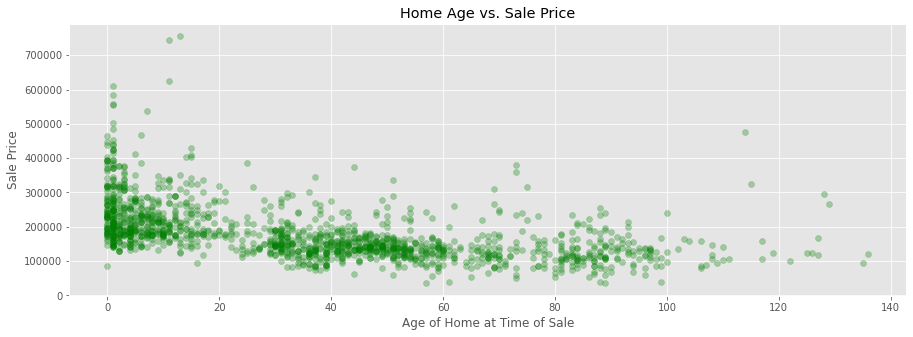

In [136]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
# Replace None with appropriate text
"""
Homes that are less than 20 years old when sold were all close to the sale price median range and above out of 
all homes sold. The most expensive homes ranging at 400,000 USD and above are almost all represented in this range. 
Generally the newer the home when sold the higher the sale price. Many homes that were 20 to 60 years old at time of 
sale congregate closer to the median, but we begin to see that home sale price begins to drop below the median 
the older the home with some exceptions.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.